# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy as sp
from scipy.stats import linregress


import time


from scipy.stats import linregress

# Import API key
#from api_keys import weather_api_key
from api_keys import weather_api_key
from api_keys import  g_key
#from weather_api import weather_api as api



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

In [3]:
#read the csv file and display
weatherData=pd.read_csv(output_data_file)
weatherData.head()

,Unnamed: 0,City,Country,Date,Latitude,Longitude,Max Temp(f),Humidity,Wind Speed,Cloudiness
0,0,Port Alfred,ZA,1613331959,-33.5906,26.8910,72.00,93,4.00,96
1,1,Hilo,US,1613331663,19.7297,-155.0900,70.00,83,5.75,90
2,2,Yashkul',RU,1613332535,46.1711,45.3435,29.57,86,9.86,99
3,3,Santiago de Cao,PE,1613332535,-7.9589,-79.2392,71.60,88,11.50,75
4,4,Hecun,CN,1613332535,36.5333,114.1111,34.03,87,5.88,23


In [4]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

In [6]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#Url

url = "http://api.openweathermap.org/data/2.5/weather?q="
extension = "&units=imperial&appid="

In [8]:
location_name = []
location_country = []
date = []
latitude = []
longitude = []
max_temperature = []
humidity = []
wind_speed = []
cloudiness = []

city_counter=0
tot_cities=len(cities)

print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    success=True
    data_json = requests.get(url+city+extension+weather_api_key)
    time.sleep(1)

    data_json = data_json.json()
    
    # code By Lecture or from class
    try:
        location_name.append(data_json['name'])
        location_country.append(data_json['sys']['country'])
        date.append(data_json['dt'])
        latitude.append(data_json['coord']['lat'])
        longitude.append(data_json['coord']['lon'])
        max_temperature.append(data_json['main']['temp_max'])
        humidity.append(data_json['main']['humidity'])
        wind_speed.append(data_json['wind']['speed'])
        cloudiness.append(data_json['clouds']['all'])
        success=True
        
    except:
        tot_cities -= 1
        city_counter = city_counter
        print(f"City not found. Skipping...")
        success=False
        
    if success:
        print(f"Processing Record {city_counter} of {tot_cities} | {city}")
        city_counter += 1


Beginning Data Retrieval
-----------------------------
Processing Record 0 of 606 | avarua
Processing Record 1 of 606 | jurm
Processing Record 2 of 606 | alyangula
Processing Record 3 of 606 | necochea
Processing Record 4 of 606 | north bend
Processing Record 5 of 606 | qaanaaq
Processing Record 6 of 606 | rikitea
Processing Record 7 of 606 | traverse city
Processing Record 8 of 606 | hermanus
Processing Record 9 of 606 | xai-xai
Processing Record 10 of 606 | hilo
Processing Record 11 of 606 | arraial do cabo
Processing Record 12 of 606 | new norfolk
Processing Record 13 of 606 | maniitsoq
Processing Record 14 of 606 | darnah
Processing Record 15 of 606 | aqtobe
Processing Record 16 of 606 | albany
Processing Record 17 of 606 | barrow
Processing Record 18 of 606 | hasaki
Processing Record 19 of 606 | ushuaia
Processing Record 20 of 606 | lagoa
Processing Record 21 of 606 | yellowknife
Processing Record 22 of 606 | arroyo
Processing Record 23 of 606 | saint george
Processing Record 24 o

Processing Record 195 of 593 | jumla
City not found. Skipping...
Processing Record 196 of 592 | yuanping
Processing Record 197 of 592 | paamiut
Processing Record 198 of 592 | tattayyangarpettai
Processing Record 199 of 592 | inuvik
Processing Record 200 of 592 | los llanos de aridane
Processing Record 201 of 592 | sant pere de ribes
Processing Record 202 of 592 | sao filipe
Processing Record 203 of 592 | sawtell
Processing Record 204 of 592 | ligayan
Processing Record 205 of 592 | leningradskiy
Processing Record 206 of 592 | petukhovo
City not found. Skipping...
Processing Record 207 of 591 | yantal
Processing Record 208 of 591 | makat
Processing Record 209 of 591 | seddon
Processing Record 210 of 591 | geraldton
Processing Record 211 of 591 | umea
Processing Record 212 of 591 | muisne
Processing Record 213 of 591 | faanui
Processing Record 214 of 591 | torbay
Processing Record 215 of 591 | muncie
Processing Record 216 of 591 | teknaf
Processing Record 217 of 591 | abdanan
Processing R

Processing Record 387 of 575 | vengerovo
Processing Record 388 of 575 | the valley
Processing Record 389 of 575 | qasigiannguit
Processing Record 390 of 575 | nuristan
Processing Record 391 of 575 | stara vyzhivka
Processing Record 392 of 575 | puerto suarez
Processing Record 393 of 575 | prabumulih
Processing Record 394 of 575 | ginir
Processing Record 395 of 575 | isangel
Processing Record 396 of 575 | arcata
Processing Record 397 of 575 | timbiqui
Processing Record 398 of 575 | sechura
Processing Record 399 of 575 | grindavik
Processing Record 400 of 575 | mayo
Processing Record 401 of 575 | axim
Processing Record 402 of 575 | mahibadhoo
Processing Record 403 of 575 | taltal
Processing Record 404 of 575 | brenham
Processing Record 405 of 575 | manacapuru
Processing Record 406 of 575 | canico
Processing Record 407 of 575 | mocuba
Processing Record 408 of 575 | benin
Processing Record 409 of 575 | luang prabang
City not found. Skipping...
Processing Record 410 of 574 | meadow lake
Cit

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_df = pd.DataFrame({
    #"City ID":len(ids),
    "City":len(location_name),
    "Country":len(location_country),
    "Date":len(date),
    "Latitude":len(latitude),
    "Longitude":len(longitude),
    "Max Temp(f)":len(max_temperature),
    "Humidity":len(humidity),
    "Wind Speed":len(wind_speed),
    "Cloudiness":len(cloudiness),
},index=[0]).transpose()
weather_df

,0
City,559
Country,559
Date,559
Latitude,559
Longitude,559
Max Temp(f),559
Humidity,559
Wind Speed,559
Cloudiness,559


In [16]:

# Save city data into a csv file
weather_df.to_csv("output_data/new_city.csv")


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
cleaned_data_df = weather_df[weather_df["Humidity"] < 100]
cleaned_data_df

,City,Country,Date,Latitude,Longitude,Max Temp(f),Humidity,Wind Speed,Cloudiness
0,Avarua,CK,1613335308,-21.2078,-159.7750,84.20,79,4.61,20
1,Jurm,AF,1613335309,36.8648,70.8342,33.76,70,5.55,31
2,Alyangula,AU,1613335310,-13.8483,136.4192,80.60,89,4.61,98
3,Necochea,AR,1613335311,-38.5473,-58.7368,69.01,89,11.99,100
4,North Bend,US,1613335313,43.4065,-124.2243,50.00,81,6.91,90
...,...,...,...,...,...,...,...,...,...
554,Sabzawār,IR,1613335922,36.2126,57.6819,50.65,45,6.87,0
555,São José da Coroa Grande,BR,1613335893,-8.8978,-35.1478,79.25,81,10.56,46
556,Turki,RU,1613336017,51.9870,43.2731,-3.91,92,8.72,54
557,Pisco,PE,1613336018,-13.7000,-76.2167,80.60,57,17.27,0


In [10]:
weather_df = pd.DataFrame({
    #"Location ID":location_ids,
    "City":location_name,
    "Country":location_country,
    "Date":date,
    "Latitude":latitude,
    "Longitude":longitude,
    "Max Temp(f)":max_temperature,
    "Humidity":humidity,
    "Wind Speed":wind_speed,
    "Cloudiness":cloudiness,
})
weather_df.to_csv("output_data/cities.csv")
weather_df.head()

,City,Country,Date,Latitude,Longitude,Max Temp(f),Humidity,Wind Speed,Cloudiness
0,Avarua,CK,1613335308,-21.2078,-159.7750,84.20,79,4.61,20
1,Jurm,AF,1613335309,36.8648,70.8342,33.76,70,5.55,31
2,Alyangula,AU,1613335310,-13.8483,136.4192,80.60,89,4.61,98
3,Necochea,AR,1613335311,-38.5473,-58.7368,69.01,89,11.99,100
4,North Bend,US,1613335313,43.4065,-124.2243,50.00,81,6.91,90


In [21]:
#  Get the indices of cities that have humidity over 100%.

humidity_df = weather_df[weather_df["Humidity"] > 100]

humidity_df

humidity_index = humidity_df.index
humidity_index


Int64Index([], dtype='int64')

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [22]:
cleaned_data_df = weather_df[weather_df["Humidity"] < 100]
cleaned_data_df


,City,Country,Date,Latitude,Longitude,Max Temp(f),Humidity,Wind Speed,Cloudiness
0,Avarua,CK,1613335308,-21.2078,-159.7750,84.20,79,4.61,20
1,Jurm,AF,1613335309,36.8648,70.8342,33.76,70,5.55,31
2,Alyangula,AU,1613335310,-13.8483,136.4192,80.60,89,4.61,98
3,Necochea,AR,1613335311,-38.5473,-58.7368,69.01,89,11.99,100
4,North Bend,US,1613335313,43.4065,-124.2243,50.00,81,6.91,90
...,...,...,...,...,...,...,...,...,...
554,Sabzawār,IR,1613335922,36.2126,57.6819,50.65,45,6.87,0
555,São José da Coroa Grande,BR,1613335893,-8.8978,-35.1478,79.25,81,10.56,46
556,Turki,RU,1613336017,51.9870,43.2731,-3.91,92,8.72,54
557,Pisco,PE,1613336018,-13.7000,-76.2167,80.60,57,17.27,0


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
plt.scatter(weather_df["Latitude"], weather_df["Max Temp(f)"], edgecolors="black")
plt.grid(color="grey")
plt.title("City Latitude vs. Max Temperature (April 3, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (f)")

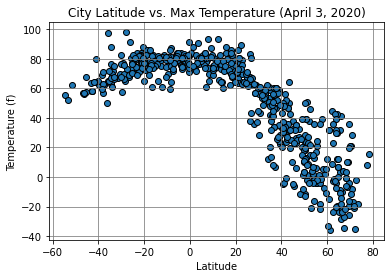

In [27]:
plt.show()

The plot shows change in latitude and how correlates to the temperature value recorded.
The data shows that as the latitude towards zero the temperature gets higher.and as latitude goes towards pozative the temprature decrease.

## Latitude vs. Humidity Plot

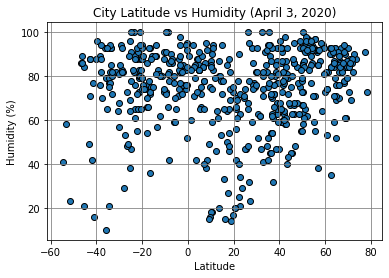

In [25]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], edgecolors="black")
plt.grid(color="grey")
plt.title("City Latitude vs Humidity (April 3, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()


This plot shows, the humidity intense in both lower latitude and higher latitude equally. And there is some humidity 

both in negative and pozative latitude.

## Latitude vs. Cloudiness Plot

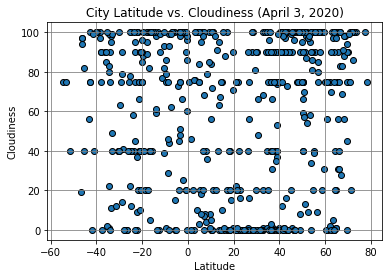

In [28]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], edgecolors="black")
plt.grid(color="grey")
plt.title("City Latitude vs. Cloudiness (April 3, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

This data shows, there are  data is dispersed in all all of latitude.

## Latitude vs. Wind Speed Plot

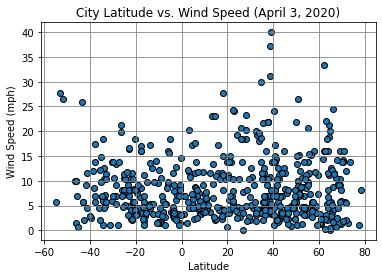

In [29]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], edgecolors="black")
plt.grid(color="grey")
plt.title("City Latitude vs. Wind Speed (April 3, 2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()

This plot shows, the wind speed is intense towards zero in both negative and pozative latitude.

## Linear Regression

In [30]:
def linear_regression(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = sp.linregress(x,y)
    line = slope*x+intercept
    plt.scatter(x, y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.plot(x,line,"-", color='r',linewidth=3)
    #plt.annotate(line,(x,y),fontsize=15,color="red")
    
    if slope < 0:
        print(f"R-Squared Value: -{r_value**2}")
    else:
        print(f"R-Squared Value: {r_value**2}")
        


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [31]:
northern = weather_df[weather_df['Latitude']>0]
southern = weather_df[weather_df['Latitude']<0]


The r-squared is: -0.8714227787822902


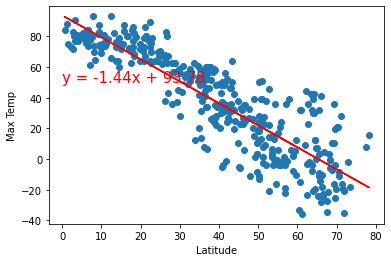

In [33]:



x_values=northern['Latitude']

y_values = northern['Max Temp(f)']


x_values=northern['Latitude']

y_values = northern['Max Temp(f)']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")


plt.savefig('output_data/NH_MTL.png')
plt.show()


The regression line shows as the temperature drops when the latitude is away from zero . 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2093589370818777


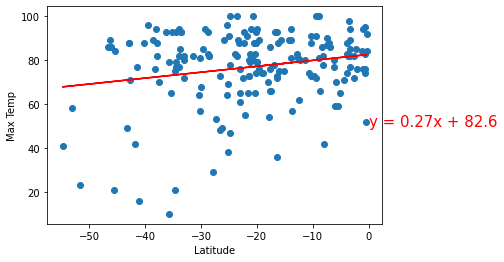

<Figure size 432x288 with 0 Axes>

In [34]:
x_values =southern['Latitude']

y_values = southern['Humidity']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('output_data/SH_MTL.png')

The regression line above shows as the temperature drops when the latitude is away from zero . 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3096257484897916


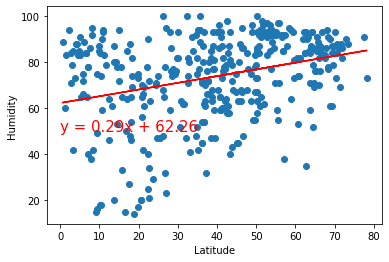

<Figure size 432x288 with 0 Axes>

In [35]:
x_values =northern['Latitude']

y_values = northern['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('output_data/NHHL.png')

the above linear regreasion show as the humidity is intense between 0 to 80 latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2093589370818777


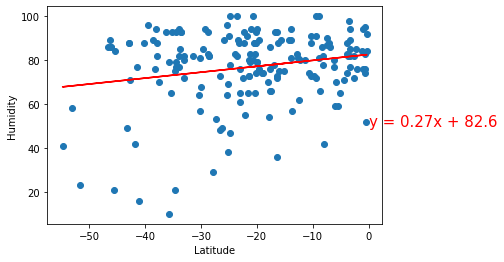

<Figure size 432x288 with 0 Axes>

In [36]:
x_values =southern['Latitude']

y_values = southern['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('output_data/SHHL.png')

the above linear regreasion show as the humidity is equally distributed in negative latitude.

####  Northern Hemisphere - cloudines (%) vs. Latitude Linear Regression

The r-squared is: 0.2714808551509449


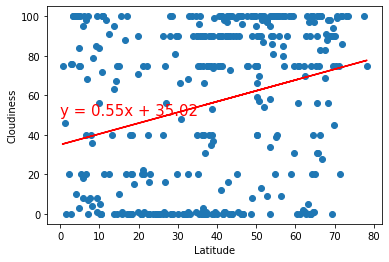

<Figure size 432x288 with 0 Axes>

In [37]:
x_values =northern['Latitude']

y_values = northern['Cloudiness']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('output_data/NHCL.png')

the above linear regreasion show as the cloudiness is intense between 0 to 80 latitude.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03533226626317654


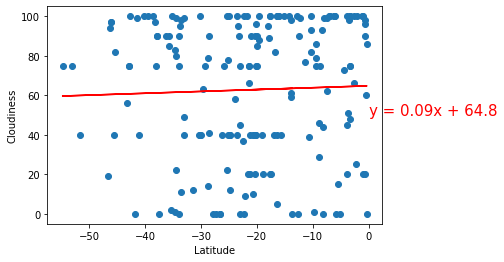

<Figure size 432x288 with 0 Axes>

In [38]:
x_values =southern['Latitude']

y_values = southern['Cloudiness']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('output_data/SHCL.png')

the above linear regreasion show as, the cloudiness dispersed in negative latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0037131237599113873


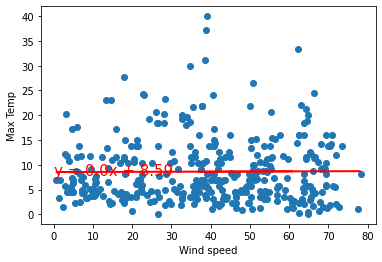

<Figure size 432x288 with 0 Axes>

In [39]:
x_values = northern['Latitude']

y_values = northern['Wind Speed']
# plt.scatter(x_values,y_values)
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,8),fontsize=15,color="red")
plt.xlabel('Wind speed')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('output_data/NHWSL.png')

the above linear regreasion show as, there are intensified max temp below 15 between 0 to 80 latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.23021743364307154


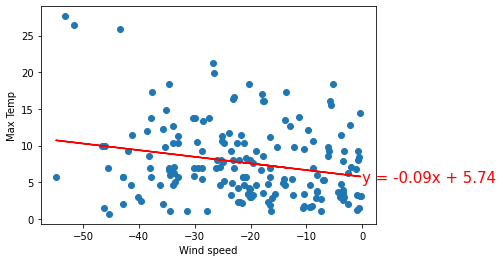

<Figure size 432x288 with 0 Axes>

In [41]:
x_values = southern['Latitude']

y_values = southern['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,5),fontsize=15,color="red")
plt.xlabel('Wind speed')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig('output_data/SHWSL.png')

In [ ]:
the above linear regreasion show as the max Temp is dispresed below zero latitude.